**INSTALLING REQUIRED DEPENDENCIES**

In [1]:
# ! pip install numpy
# ! pip install pandas
# ! pip install scikit-learn

**IMPORTING REQUIRED LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

**Loading the data into dataframe**

In [3]:
# Loading the data from csv file and converting to dataframe
df = pd.read_csv("/content/Transactions_dataset.csv")

**Exploring the data**

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
#Checking if the dataset as null values

print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


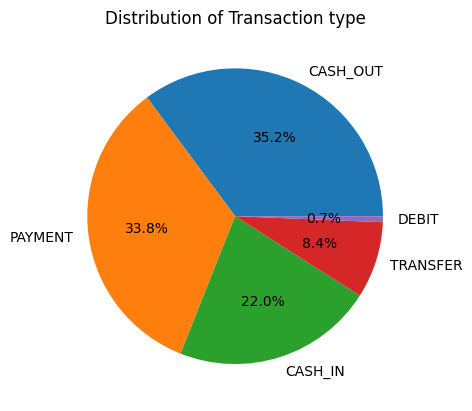

In [6]:
#Checking type of transactions we are dealing with

transc_type = df["type"].value_counts()
transaction_types = transc_type.index
quantity = transc_type.values

# Create the pie chart
plt.pie(quantity, labels=transaction_types, autopct='%1.1f%%')

# Add title (optional)
plt.title('Distribution of Transaction type')

# Display the chart
plt.show()

In [7]:
# Checking number of fraud & non-fraud transactions in the given dataset

print(df['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [8]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [9]:
# Looking at the correlation between the features of the data with the isFraud column

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation
correlation = numeric_df.corr()

abs_correlation = correlation.abs()

print(correlation["isFraud"].sort_values(ascending=False))
print()
print(abs_correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceOrig    0.008148
oldbalanceDest    0.005885
newbalanceDest    0.000535
Name: isFraud, dtype: float64


**Let's take features which are more coorelated with the target variable to ensure better training of the model.**

1.  amount
2.  type              
3.  oldbalanceOrg     
4.  newbalanceOrig    








In [10]:
# Transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output

df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [11]:
# splitting the data into features and target variable

x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [13]:
# Dividing the data into train and test splits

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

0.9997029525572798


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)
    # Predict on the test set
    ypred = model.predict(xtest)
    # Compute accuracy
    accuracy = accuracy_score(ytest, ypred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")


***Acccuracy results***

"Logistic Regression": 0.983

"K-Nearest Neighbors": 0.988

"Support Vector Machine": 0.076

"Decision Tree": 0.994